In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from fuzzywuzzy import process

C:\Users\KEYLLA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
#carga de datos del CSV
data=pd.read_csv('AccidentesAviones.csv')

In [3]:
data.head(1)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."


In [4]:
#renombramos para facilidad de trabajo
nuevos_nombres = {'fecha':'fecha',
    'HORA declarada':'hora',
    'Ruta':'ubicacion',
    'OperadOR':'operador',
    'flight_no':'n_vuelo',
    'route':'ruta',
    'ac_type':'tipo',
    'registration':'registro',
    'cn_ln':'serie_fuselaje',
    'all_aboard':'total_abordo',
    'PASAJEROS A BORDO':'pasajeros_abordo',
    'crew_aboard':'tripulacion_abordo',
    'cantidad de fallecidos':'total_fallecidos',
    'passenger_fatalities':'pasajeros_fallecidos',
    'crew_fatalities':'tripulacion_fallecidos',
    'ground':'fallecidos_tierra','summary':'resumen'
}
data.rename(columns=nuevos_nombres, inplace=True)

In [5]:
data.head(2)

,Unnamed: 0,fecha,hora,ubicacion,operador,n_vuelo,ruta,tipo,registro,serie_fuselaje,total_abordo,pasajeros_abordo,tripulacion_abordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecidos,fallecidos_tierra,resumen
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


In [6]:
data.shape

(5008, 18)

In [7]:
#eliminamos la primera columna que a simple vista no nos sirve
data.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
#cambiamos los ? por nulo
data = data.replace('?', np.nan)

In [9]:
data.isnull().sum()

fecha                        0
hora                      1504
ubicacion                    5
operador                    10
n_vuelo                   3682
ruta                       762
tipo                        13
registro                   272
serie_fuselaje             667
total_abordo                17
pasajeros_abordo           221
tripulacion_abordo         219
total_fallecidos             8
pasajeros_fallecidos       235
tripulacion_fallecidos     235
fallecidos_tierra           44
resumen                     59
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha                   5008 non-null   object
 1   hora                    3504 non-null   object
 2   ubicacion               5003 non-null   object
 3   operador                4998 non-null   object
 4   n_vuelo                 1326 non-null   object
 5   ruta                    4246 non-null   object
 6   tipo                    4995 non-null   object
 7   registro                4736 non-null   object
 8   serie_fuselaje          4341 non-null   object
 9   total_abordo            4991 non-null   object
 10  pasajeros_abordo        4787 non-null   object
 11  tripulacion_abordo      4789 non-null   object
 12  total_fallecidos        5000 non-null   object
 13  pasajeros_fallecidos    4773 non-null   object
 14  tripulacion_fallecidos  4773 non-null   object
 15  fall

In [11]:
#quitamos los saltos de linea en las columnas
data["registro"] = data["registro"].str.replace("/r|\r", "/")
data["ubicacion"] = data["ubicacion"].str.replace("/r|\r", "/")
data["resumen"] = data["resumen"].str.replace("/r|\r", "/")
data["operador"] = data["operador"].str.replace("/r|\r", "/")
data["tipo"] = data["tipo"].str.replace("/r|\r", "/")
data["ruta"] = data["ruta"].str.replace("/r|\r", "/")
data["serie_fuselaje"] = data["serie_fuselaje"].str.replace("/r|\r", "/")

C:\Users\KEYLLA\AppData\Local\Temp\ipykernel_21416\1529450048.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["registro"] = data["registro"].str.replace("/r|\r", "/")
C:\Users\KEYLLA\AppData\Local\Temp\ipykernel_21416\1529450048.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["ubicacion"] = data["ubicacion"].str.replace("/r|\r", "/")
C:\Users\KEYLLA\AppData\Local\Temp\ipykernel_21416\1529450048.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["resumen"] = data["resumen"].str.replace("/r|\r", "/")
C:\Users\KEYLLA\AppData\Local\Temp\ipykernel_21416\1529450048.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data["operador"] = data["operador"].str.replace("/r|\r", "/")
C:\Users\KEYLLA\AppData\Local\Temp\ipykernel_21416\1529450048.py:6: FutureWarning: The default v

In [12]:
#cambiar la coma por punto y coma para subir el csv a power bi, sino divide la fila resumen en dos por la coma
data["resumen"] = data["resumen"].str.replace(",", ";")

### limpiar y cambiar a foramto HH:mm la columna hora

In [13]:
# Reemplazar los valores '?' por nulos
data['hora'] = data['hora'].replace('?', np.nan)
# quitar valores que no sirven
data['hora'] = data['hora'].str.replace(':', '')
data['hora'] = data['hora'].str.replace('c', '')
data['hora'] = data['hora'].str.replace('Z', '')
data['hora'] = data['hora'].str.replace(';', '')

#limpiar los espacios vacíos
data['hora'] = data['hora'].str.strip()

#función para agregar cero al inicio o al final según corresponda
def agregar_ceros(num):
    if pd.isnull(num):
        return num
    elif isinstance(num, str) and len(num) == 3:
        ultimas_cifras = int(num[1:])
        if ultimas_cifras < 60:
            return '0' + num
        else:
            return num + '0'
    return num

data['hora'] = data['hora'].apply(agregar_ceros)

In [14]:
# Contar las filas con menos de 4 cifras excluyendo los valores nulos
count = (data['hora'].str.len() < 4) & (data['hora'].notna())
print("Número de filas con menos de 4 caracteres (excluyendo nulos):", count.sum())

Número de filas con menos de 4 caracteres (excluyendo nulos): 0


In [15]:
# Filtrar y mostrar los valores con menos de 4 caracteres excluyendo los valores nulos
result = data.loc[(data['hora'].str.len() < 4) & (data['hora'].notna())]

# Mostrar el resultado
print(result)

Empty DataFrame
Columns: [fecha, hora, ubicacion, operador, n_vuelo, ruta, tipo, registro, serie_fuselaje, total_abordo, pasajeros_abordo, tripulacion_abordo, total_fallecidos, pasajeros_fallecidos, tripulacion_fallecidos, fallecidos_tierra, resumen]
Index: []


#### Crear la nueva columna Date Time

In [16]:
#cambiar los nulos por 0000
data['hora'] = data['hora'].fillna('0000')
#cambiar a formato HH:mm
data['hora'] = pd.to_datetime(data['hora'], format='%H%M', errors='coerce').dt.strftime('%H:%M')

#sumar las doclumnas Fecha + hora
data['fecha_hora'] = data['fecha'] + ' ' + data['hora']
#pasar a data time la nueva columna
data['fecha_hora'] = pd.to_datetime(data['fecha_hora'])

In [17]:
data.head(2)

,fecha,hora,ubicacion,operador,n_vuelo,ruta,tipo,registro,serie_fuselaje,total_abordo,pasajeros_abordo,tripulacion_abordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecidos,fallecidos_tierra,resumen,fecha_hora
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,During a demonstration flight; a U.S. Army fly...,1908-09-17 17:18:00
1,"September 07, 1909",00:00,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909-09-07 00:00:00


#### Creamos nueva Pais

In [18]:
#creamos nueva columna con ciudades
data['ubicacion_pais']  = data['ubicacion'].str.split(',').str[-1].str.strip()#.str.lower() #.str.upper()

In [19]:
# creamos una lista con todos los estados de USA
estados = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
    'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
    'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming'
]
#convertimos a cadena la columna ubicacion_pais
data['ubicacion_pais'] = data['ubicacion_pais'].astype(str)
# Aplicamos una funcion para reemplazar los nombres de estados por el país en la columna ubicacion_pais
def encontrar_mejor_coincidencia(texto):
    mejor_coincidencia = process.extractOne(texto, estados)
    if mejor_coincidencia[1] >= 80:  # Umbral de similitud
        return 'USA'
    else:
        return texto

# Reemplazar las palabras similares en la columna 'pais'
data['ubicacion_pais'] = data['ubicacion_pais'].apply(encontrar_mejor_coincidencia)


In [20]:
data['ubicacion_pais'].dtype

dtype('O')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   object        
 1   hora                    5008 non-null   object        
 2   ubicacion               5003 non-null   object        
 3   operador                4998 non-null   object        
 4   n_vuelo                 1326 non-null   object        
 5   ruta                    4246 non-null   object        
 6   tipo                    4995 non-null   object        
 7   registro                4736 non-null   object        
 8   serie_fuselaje          4341 non-null   object        
 9   total_abordo            4991 non-null   object        
 10  pasajeros_abordo        4787 non-null   object        
 11  tripulacion_abordo      4789 non-null   object        
 12  total_fallecidos        5000 non-null   object  

In [22]:
data.head(1)

,fecha,hora,ubicacion,operador,n_vuelo,ruta,tipo,registro,serie_fuselaje,total_abordo,pasajeros_abordo,tripulacion_abordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecidos,fallecidos_tierra,resumen,fecha_hora,ubicacion_pais
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,During a demonstration flight; a U.S. Army fly...,1908-09-17 17:18:00,USA


#### Columna Fecha

In [23]:
# Convertir la columna al tipo de datos de fecha omitiendo los valores nulos
data['fecha'] = pd.to_datetime(data['fecha'], errors='coerce')

### Crear columna sobrevivientes

#### rellenamos datos nulos en las columnas

In [24]:
data['ruta'] = data['ruta'].fillna('no_definido')
data['resumen'] = data['resumen'].fillna('sin_comentario')
data['operador'] = data['operador'].fillna('desconocido')
data['tipo'] = data['tipo'].fillna('sin_tipo')

In [25]:
data.head(2)

,fecha,hora,ubicacion,operador,n_vuelo,ruta,tipo,registro,serie_fuselaje,total_abordo,pasajeros_abordo,tripulacion_abordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecidos,fallecidos_tierra,resumen,fecha_hora,ubicacion_pais
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,During a demonstration flight; a U.S. Army fly...,1908-09-17 17:18:00,USA
1,1909-09-07,00:00,"Juvisy-sur-Orge, France",desconocido,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909-09-07 00:00:00,France


In [26]:
#cambio los valores nulos a 0
columnas = ['total_abordo', 'pasajeros_abordo', 'tripulacion_abordo','total_fallecidos', 'pasajeros_fallecidos', 'tripulacion_fallecidos','fallecidos_tierra']
data[columnas] = data[columnas].fillna(0)

In [27]:
data.head(2)

,fecha,hora,ubicacion,operador,n_vuelo,ruta,tipo,registro,serie_fuselaje,total_abordo,pasajeros_abordo,tripulacion_abordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecidos,fallecidos_tierra,resumen,fecha_hora,ubicacion_pais
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,During a demonstration flight; a U.S. Army fly...,1908-09-17 17:18:00,USA
1,1909-09-07,00:00,"Juvisy-sur-Orge, France",desconocido,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909-09-07 00:00:00,France


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   hora                    5008 non-null   object        
 2   ubicacion               5003 non-null   object        
 3   operador                5008 non-null   object        
 4   n_vuelo                 1326 non-null   object        
 5   ruta                    5008 non-null   object        
 6   tipo                    5008 non-null   object        
 7   registro                4736 non-null   object        
 8   serie_fuselaje          4341 non-null   object        
 9   total_abordo            5008 non-null   object        
 10  pasajeros_abordo        5008 non-null   object        
 11  tripulacion_abordo      5008 non-null   object        
 12  total_fallecidos        5008 non-null   object  

In [29]:
#df['age'] = df['age'].astype('object')
data['total_abordo']=data['total_abordo'].astype(float)
data['pasajeros_abordo']=data['pasajeros_abordo'].astype(float)
data['tripulacion_abordo']=data['tripulacion_abordo'].astype(float)
data['total_fallecidos']=data['total_fallecidos'].astype(float)
data['pasajeros_fallecidos']=data['pasajeros_fallecidos'].astype(float)
data['tripulacion_fallecidos']=data['tripulacion_fallecidos'].astype(float)
data['fallecidos_tierra']=data['fallecidos_tierra'].astype(float)
data['resumen']=data['resumen'].astype(str)


In [30]:
#creacion de la columna supervivientes

data['supervivientes'] = data.apply(lambda row: 0 if row['total_abordo'] == 0 and row['total_fallecidos'] > 0 else row['total_abordo'] - row['total_fallecidos'], axis=1)


#data['supervivientes']=data['total_abordo']-data['total_fallecidos']

In [31]:
#columna tasa de supervivencia

data["tasa_supervivencia"] = np.where(data["total_abordo"] == 0, 0, 100 * (data["supervivientes"]) / data["total_abordo"])

#data["tasa_supervivencia"] = 100 * (data["supervivientes"]) / data["total_abordo"]

In [32]:
data['es_militar']= data['operador'].str.contains('Military', regex=False)

In [33]:
#quitar nulos a la columna ubicación
data = data.dropna(subset=['ubicacion'])

In [34]:
data.shape

(5003, 22)

#### CANTIDAD DE ACCIDENTES POR AÑO

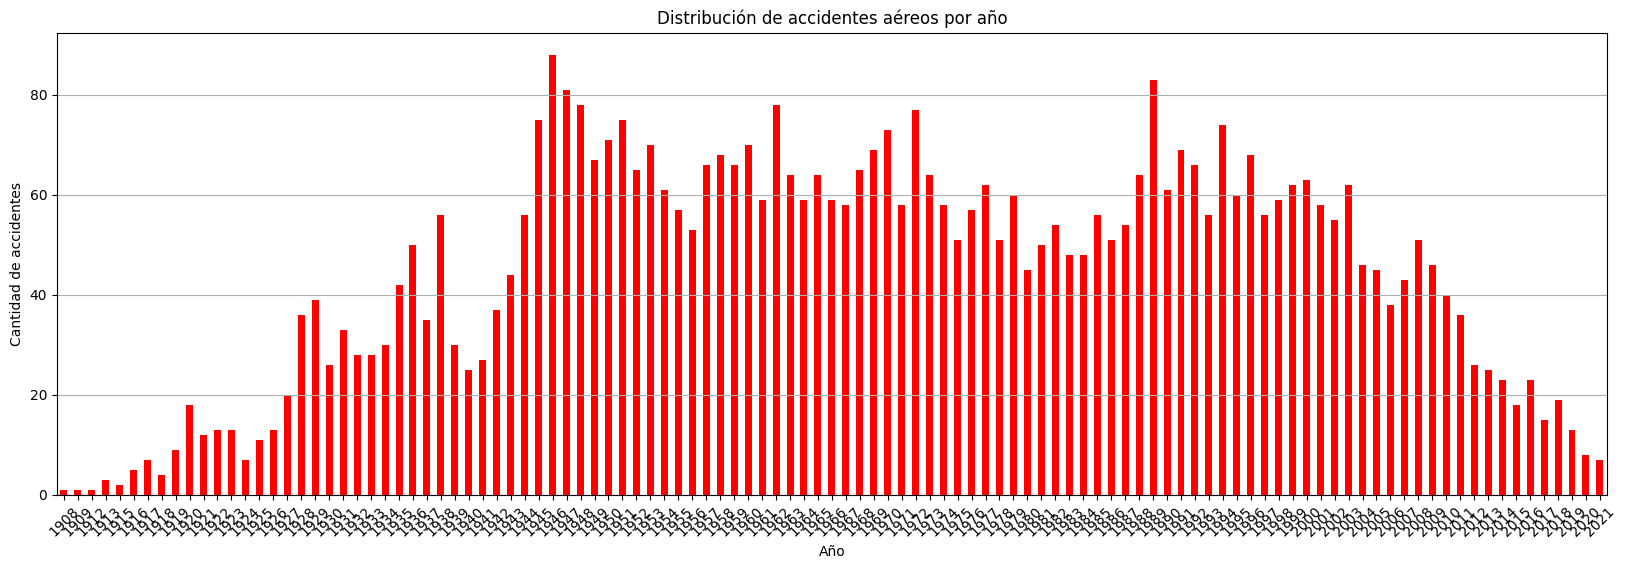

In [35]:
data['fecha'] = pd.to_datetime(data['fecha'])

# Extraer el año de la fecha y contar los accidentes por año
accidentes_por_año = data['fecha'].dt.year.value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(20, 6))
accidentes_por_año.plot(kind='bar', color='red')
plt.title('Distribución de accidentes aéreos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

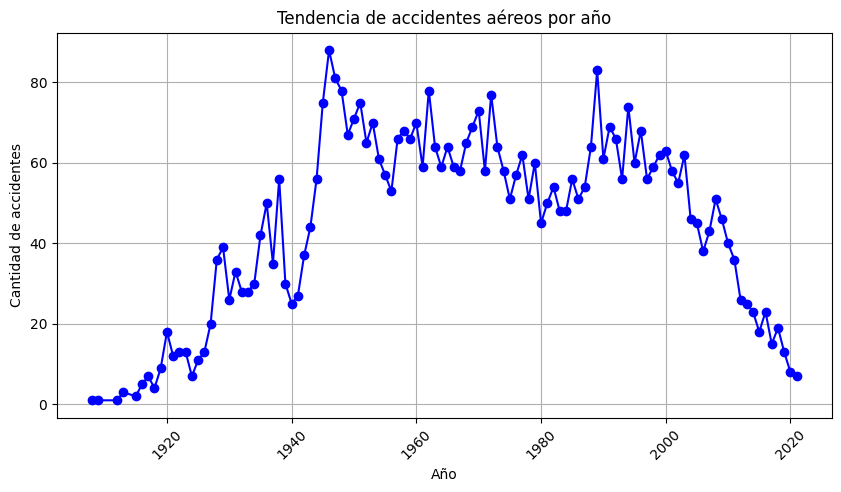

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(accidentes_por_año.index, accidentes_por_año.values, marker='o', linestyle='-', color='blue')
plt.title('Tendencia de accidentes aéreos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

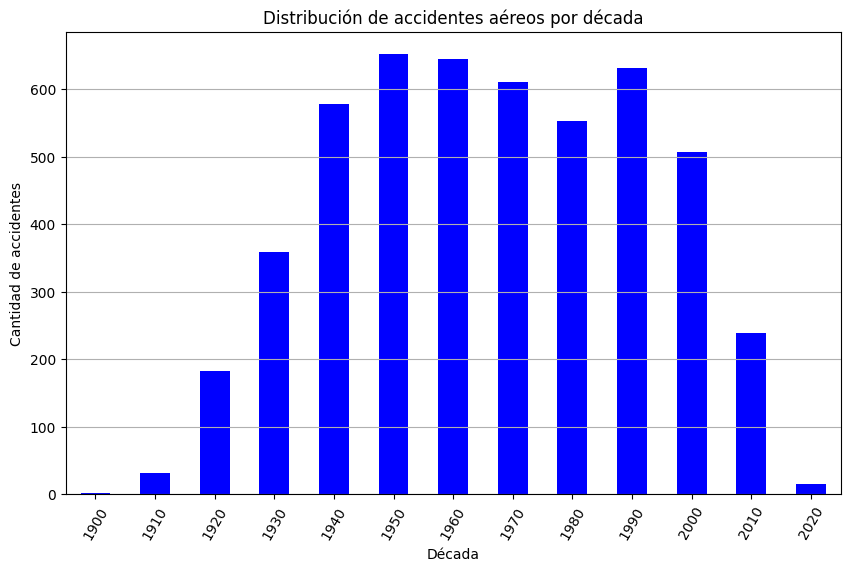

In [37]:
# Extraer el año y calcular la década
data['decada'] = data['fecha'].dt.year // 10 * 10

# Contar los accidentes por década
accidentes_por_decada = data['decada'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
accidentes_por_decada.plot(kind='bar', color='blue')
plt.title('Distribución de accidentes aéreos por década')
plt.xlabel('Década')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=60)
plt.grid(axis='y')
plt.show()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 0 to 5007
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5003 non-null   datetime64[ns]
 1   hora                    5003 non-null   object        
 2   ubicacion               5003 non-null   object        
 3   operador                5003 non-null   object        
 4   n_vuelo                 1326 non-null   object        
 5   ruta                    5003 non-null   object        
 6   tipo                    5003 non-null   object        
 7   registro                4734 non-null   object        
 8   serie_fuselaje          4340 non-null   object        
 9   total_abordo            5003 non-null   float64       
 10  pasajeros_abordo        5003 non-null   float64       
 11  tripulacion_abordo      5003 non-null   float64       
 12  total_fallecidos        5003 non-null   float64 

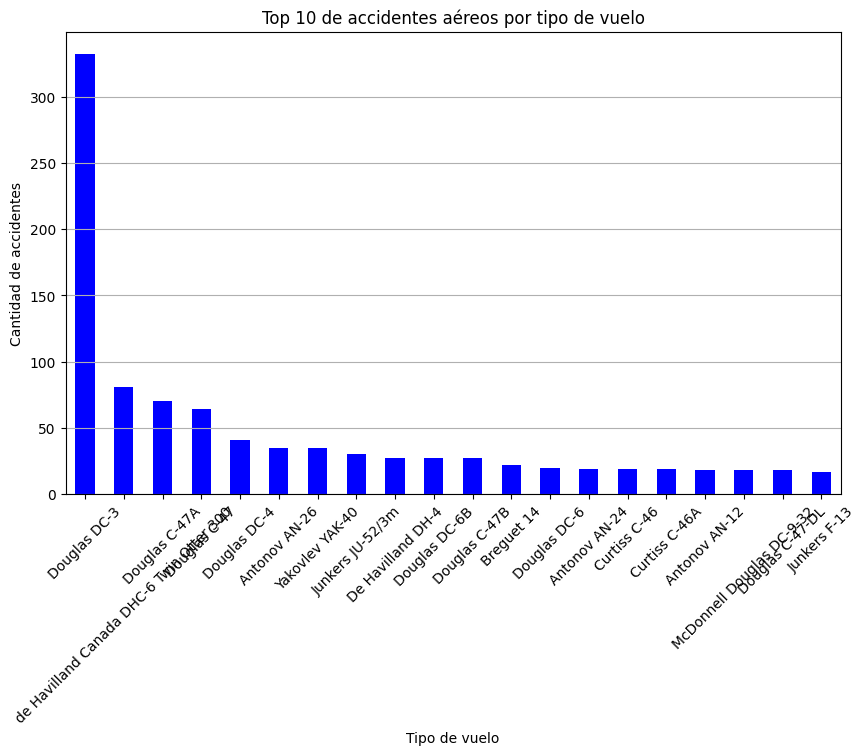

In [55]:
accidentes_por_tipo = data['tipo'].value_counts().head(20)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
accidentes_por_tipo.plot(kind='bar', color='blue')
plt.title('Top 10 de accidentes aéreos por tipo de vuelo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

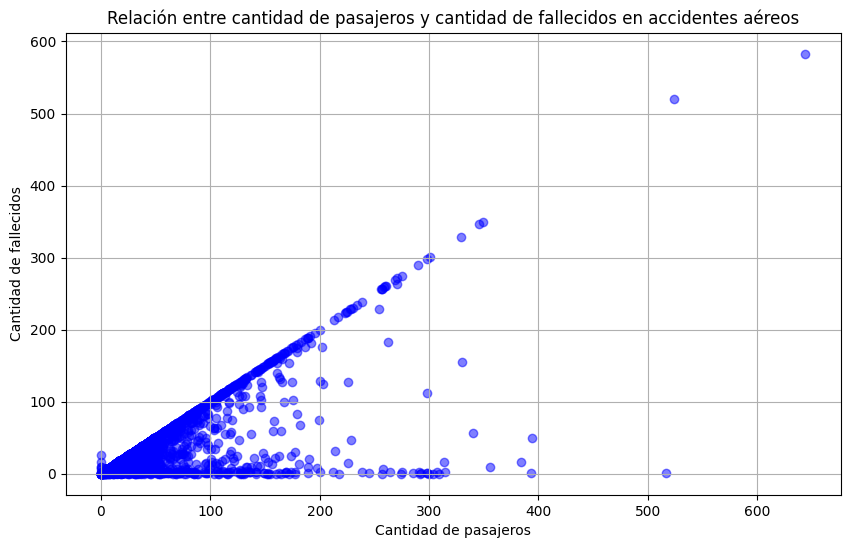

In [57]:
# Crear el gráfico de dispersión
x=data['total_abordo']
y=data['total_fallecidos']
plt.figure(figsize=(10, 6))
plt.scatter(x,y, color='blue', alpha=0.5)
plt.title('Relación entre cantidad de pasajeros y cantidad de fallecidos en accidentes aéreos')
plt.xlabel('Cantidad de pasajeros')
plt.ylabel('Cantidad de fallecidos')
plt.grid(True)
plt.show()

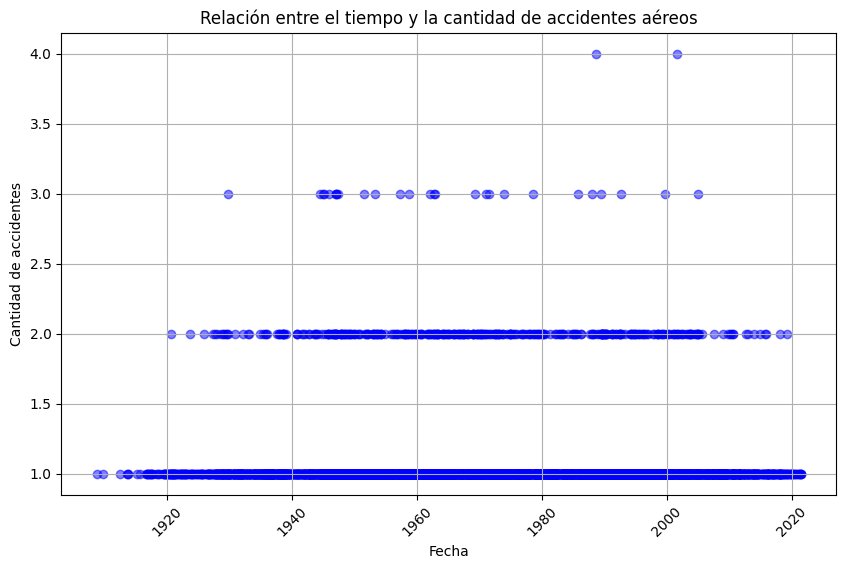

In [41]:
# Convertir la columna de fecha a tipo datetime
#data['fecha'] = pd.to_datetime(data['fecha'])

# Contar la cantidad de accidentes por fecha
accidentes_por_fecha = data['fecha'].value_counts().sort_index()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(accidentes_por_fecha.index, accidentes_por_fecha.values, color='blue', alpha=0.5)
plt.title('Relación entre el tiempo y la cantidad de accidentes aéreos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [42]:
data.head(1)

,fecha,hora,ubicacion,operador,n_vuelo,ruta,tipo,registro,serie_fuselaje,total_abordo,...,pasajeros_fallecidos,tripulacion_fallecidos,fallecidos_tierra,resumen,fecha_hora,ubicacion_pais,supervivientes,tasa_supervivencia,es_militar,decada
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,...,1.0,0.0,0.0,During a demonstration flight; a U.S. Army fly...,1908-09-17 17:18:00,USA,1.0,50.0,True,1900


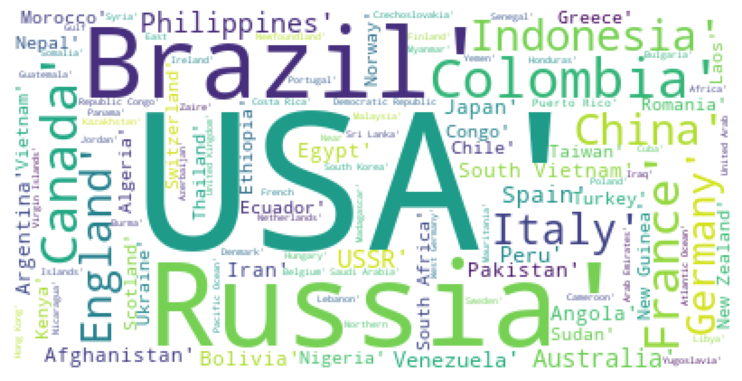

In [43]:
text1 = str(data['ubicacion_pais'].tolist())

stopwords1 = set(STOPWORDS)
stopwords1.add('aircraft')
stopwords1.add('plane')

wc1 = WordCloud(background_color="white", max_words=500,
               stopwords=stopwords1)
wc1.generate(text1)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc1) 
plt.axis("off") 
plt.tight_layout(pad = 10) 

plt.show() 

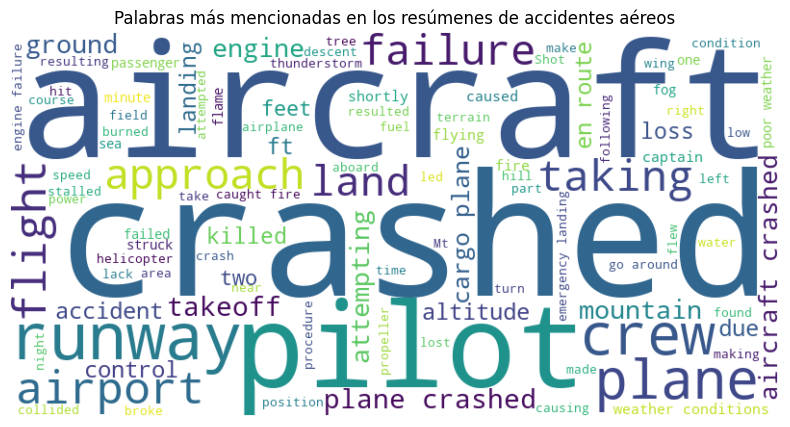

In [44]:
# Concatenar todos los resúmenes en un solo texto
text = ' '.join(data['resumen'].astype(str))

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Mostrar el gráfico de WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más mencionadas en los resúmenes de accidentes aéreos')
plt.show()

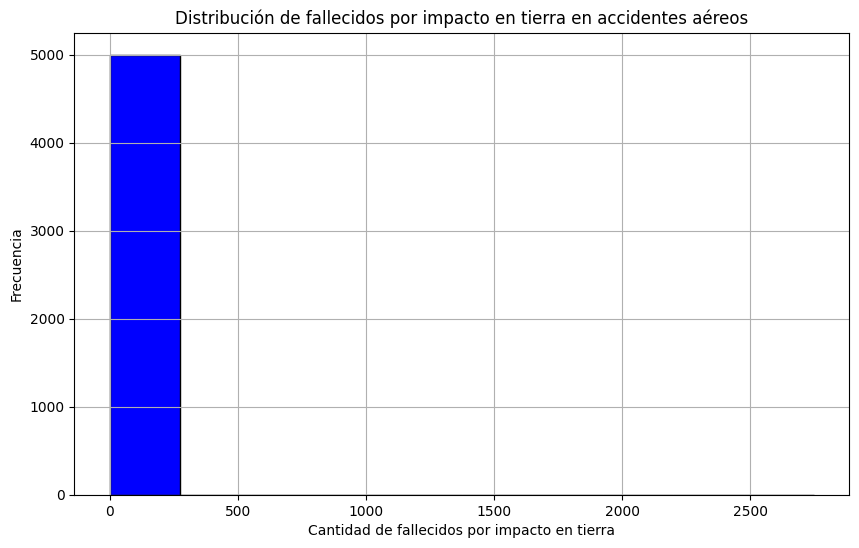

In [45]:
# Filtrar los accidentes con información sobre fallecidos por impacto en tierra
accidentes_con_impacto_tierra = data[data['fallecidos_tierra'].notnull()]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(accidentes_con_impacto_tierra['fallecidos_tierra'], bins=10, color='blue', edgecolor='black')
plt.title('Distribución de fallecidos por impacto en tierra en accidentes aéreos')
plt.xlabel('Cantidad de fallecidos por impacto en tierra')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#### Gráfico circular de la proporción de los valores acumulativos de las columnas (A bordo, Muertes, Tierra) por categoría (civil, militar).

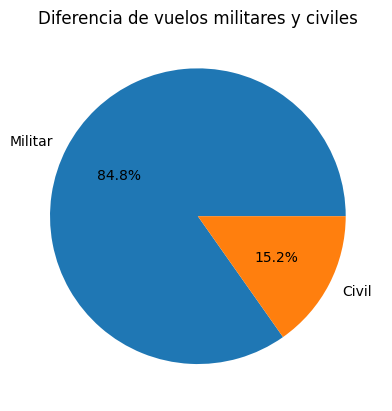

In [46]:


# Contar la cantidad de Verdaderos y Falsos
conteo = data['es_militar'].value_counts()

# Crear el gráfico circular
plt.pie(conteo, labels=['Militar', 'Civil'], autopct='%1.1f%%')

# Configurar título
plt.title('Diferencia de vuelos militares y civiles')

# Mostrar el gráfico
plt.show()

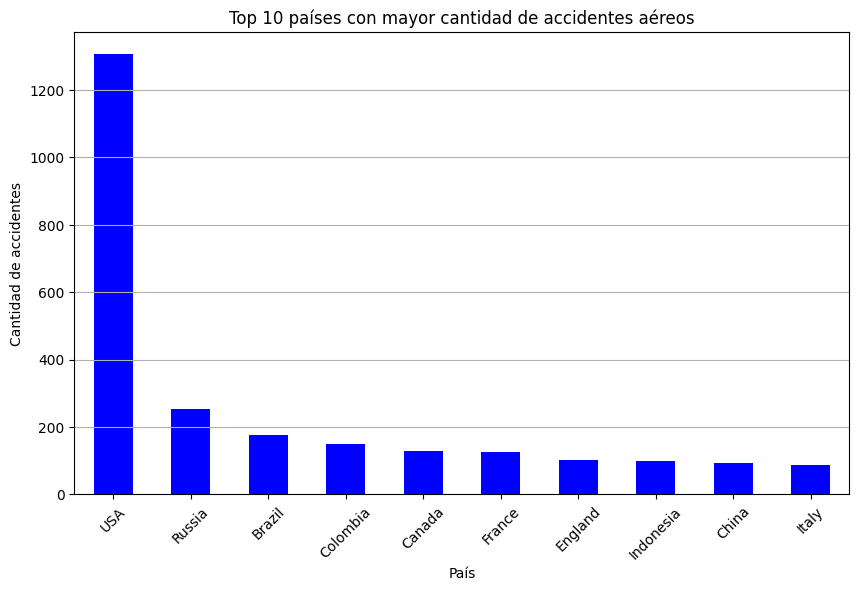

In [47]:
# Obtener el conteo de accidentes por país
conteo_accidentes_por_pais = data['ubicacion_pais'].value_counts().nlargest(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
conteo_accidentes_por_pais.plot(kind='bar', color='blue')
plt.title('Top 10 países con mayor cantidad de accidentes aéreos')
plt.xlabel('País')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

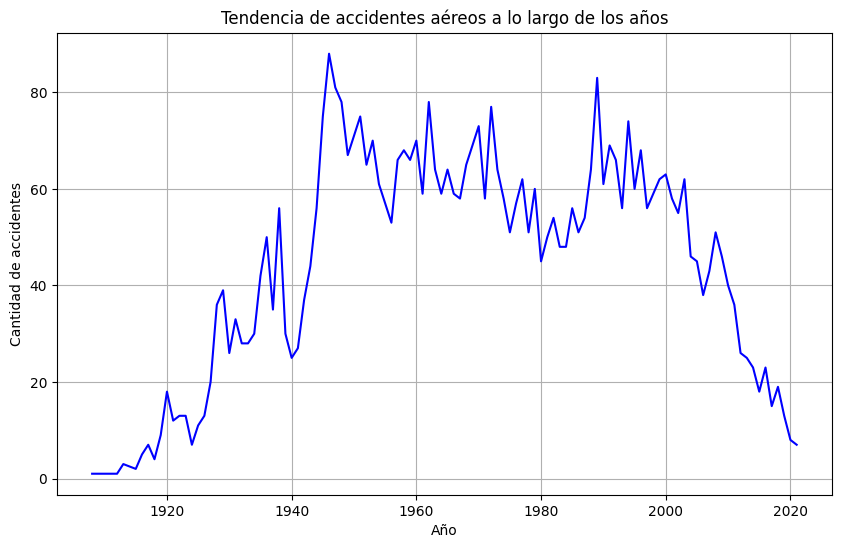

In [48]:
# Obtener el conteo de accidentes por año
conteo_accidentes_por_año = data['fecha'].dt.year.value_counts().sort_index()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(conteo_accidentes_por_año.index, conteo_accidentes_por_año.values, color='blue')
plt.title('Tendencia de accidentes aéreos a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.grid(True)
plt.show()

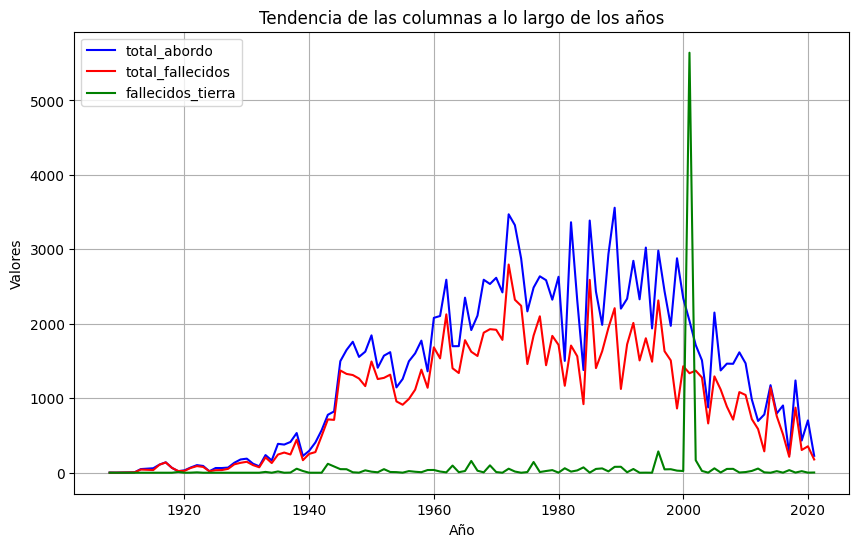

In [49]:
# Convertir la columna de fecha a tipo datetime
data['fecha'] = pd.to_datetime(data['fecha'])

# Obtener el conteo de cada columna por año
conteo_columna1_por_año = data.groupby(data['fecha'].dt.year)['total_abordo'].sum()
conteo_columna2_por_año = data.groupby(data['fecha'].dt.year)['total_fallecidos'].sum()
conteo_columna3_por_año = data.groupby(data['fecha'].dt.year)['fallecidos_tierra'].sum()

# Crear el gráfico de líneas múltiples
plt.figure(figsize=(10, 6))
plt.plot(conteo_columna1_por_año.index, conteo_columna1_por_año.values, color='blue', label='total_abordo')
plt.plot(conteo_columna2_por_año.index, conteo_columna2_por_año.values, color='red', label='total_fallecidos')
plt.plot(conteo_columna3_por_año.index, conteo_columna3_por_año.values, color='green', label='fallecidos_tierra')
plt.title('Tendencia de las columnas a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

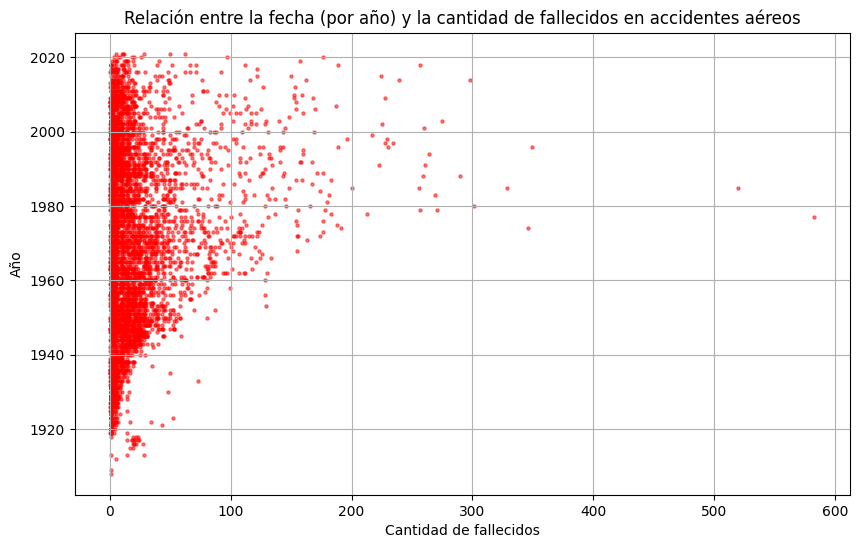

In [50]:

# Obtener el año de cada fecha
data['año'] = data['fecha'].dt.year

y=data['año']
x=data['total_fallecidos']
# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(x,y, color='red', alpha=0.5, s=5)
plt.title('Relación entre la fecha (por año) y la cantidad de fallecidos en accidentes aéreos')
plt.xlabel('Cantidad de fallecidos')
plt.ylabel('Año')
plt.grid(True)
plt.show()

In [52]:
#data.to_csv('accidentes_aereos.csv', sep=',')